# Python für Data Science

Die folgenden Aufgaben dienen euer Wissen über Python zu testen. Ausserdem werden einige Libraries vorgestellt, welche ihr später benötigt.

⚠️ **Ihr müsst die gelösten Aufgaben eurem Coach abgeben, damit sie bewertet werden.** ⚠️

## Files lesen und Arbeiten mit Python
Die Library `pathlib` ist eine Sammlung von nützlichen Funktionen für die Arbeit mit Dateien, Ordner und Pfaden (engl: path).

### 📝 Aufgabe 1.1

- Erstelle eine Funktion, welche nach Bildern sucht
- Es sollen alle Bilder mit der Endung `.jpg` gefunden werden
- Die Pfade der Bilder sollen als `Path` Objekte in einer Liste zurückgegeben werden
- Der Pfad wo das Suchen beginnen soll wird als String übergeben. Es werden auch alle Unterordner (und deren Unterordner) durchsucht.
- Stelle sicher, dass die Pfade alphabetisch sortiert zurückgegeben werden
- Stelle sicher, dass die Pfade als absolute Pfade (und nicht relative) zurückgegeben werden

Tipps:
- Benützte für das Arbeiten mit Pfaden die Library [`pathlib`](https://docs.python.org/3/library/pathlib.html) und dessen Objekt `Path`. Vermeide es mit `os.path` zu arbeiten. Gebe die Pfade direkt als `Path` Objekt zurück, nicht als Strings.
  

In [12]:
from pathlib import Path

# 📝 Dein Code:
def get_image_paths(path: str) -> [Path]:
    base_path = Path(path)
    jpg_files = list(base_path.rglob("*.jpg"))
    absolute_paths = sorted([file.resolve() for file in jpg_files])
    return absolute_paths

In [13]:
# Diese Tests könnt ihr benutzen, um euren Code zu prüfen. Bitte jedoch nicht ändern

# Arrange
import tempfile
p = Path(tempfile.gettempdir()) / "test1-1"
p.mkdir(exist_ok=True)
test_pats = [p / f"{i}.jpg" for i in range(5)]
[p.touch() for p in reversed(test_pats)]
negative = p / "negative.txt"
negative.touch()

# Assert
assert type(get_image_paths(p)) == list, "Die Funktion sollte eine Liste zurückgeben."
assert len(get_image_paths(p)) == len(test_pats), "Die Funktion sollte im Test genau 5 JPG-Bilder finden"
assert all(p.is_absolute() for p in get_image_paths('.')), "Die Funktion sollte absolute Pfade zurückgeben"
assert all(a==b for a,b in zip(get_image_paths(p), sorted([Path(p).resolve() for p in test_pats]))), "Die Funktion sollte die korrekten Pfade und sortiert zurückgeben"

# Cleanup
import shutil; shutil.rmtree(p)

### 📝 Aufgabe 1.2

- Erstelle eine Funktion, welche eine JSON-Datei einliest
  - Falls du nicht weisst, was JSON ist, findest du [hier](https://learnxinyminutes.com/json/) mehr dazu
- Als Input bekommt sie einen Pfad (`Path` Objekt)
- Als Rückgabe bekommt man die Tuple mit den Werten Angle und Speed als `float`

Der Inhalt der JSON Datei sieht z.B. aus:
```json
{"angle": -1.7668205887278248, "speed": 5}
```

Tipp:
- Benutze die [json](https://docs.python.org/3/library/json.html) Library aus der Python Standardbibliothek

In [14]:
import json
# 📝 Dein Code:

def read_angle_speed(path: Path) -> tuple[float, float]:
    with open(path) as f:
        data = json.load(f)
        angle = float(data["angle"])
        speed = float(data["speed"])
    return angle, speed

In [15]:
# Tests

# Arrange
import tempfile
p = Path(tempfile.gettempdir()) / "test1-2"
p.mkdir(exist_ok=True)
json_path = p.resolve() / "data.json"
json_path.write_text('{"angle": 0.5, "speed": 5}')

# assert return is tuple
assert type(read_angle_speed(json_path)) == tuple, "Die Funktion sollte ein Tuple zurückgeben"
assert all(type(x) == float for x in read_angle_speed(json_path)), "Der Tuple sollte zwei floats enthalten"
assert read_angle_speed(json_path) == (0.5, 5), "Die Funktion sollte die korrekten Werte zurückgeben"

# Cleanup
import shutil; shutil.rmtree(p)


## Bilder einlesen bearbeiten mit PIL (Pillow)

Pillow ist eine Python-Library um mit Bildern zu arbeiten. Du kannst mehr darüber in der offiziellen [Dokumentation](https://pillow.readthedocs.io/en/stable/) lesen. Pillow ist in unserer Umgebung schon vorinstalliert.

### 📝 Aufgabe 1.3

- Erstelle eine Funktion, welche Bilder öffnet
- Der Pfad des Bildes wird als als `Path` Objekt übergeben
- Das Bild wird als PIL `Image` Objekt zurückgegeben
- Optional soll die Funktion die Grösse des Bildes ändern
  - Wird `resize=None` übergeben, wird nichts geändert
  - Wird ein Tuple (B, W) übergeben, wird es entsprechend geändert

In [ ]:
from PIL import Image

def open_image(path: Path, resize = None) -> Image:
    img = Image.open(path)
    if resize:
        img = img.resize(resize)
    return img


In [17]:
# Tests

# Arrange
import tempfile
p = Path(tempfile.gettempdir()) / "test1-3"
p.mkdir(exist_ok=True)
img_path = p / "test.jpg"
img = Image.new('RGB', (20, 20), 'white')
img.save(img_path)

# Assert
assert issubclass(type(open_image(img_path)), Image.Image) , "Die Funktion sollte ein Image-Objekt zurückgeben"
assert open_image(img_path).size == (20, 20), "Das Bild sollte nicht verändert werden wenn kein resize angegeben ist"
assert open_image(img_path, (10, 10)).size == (10, 10), "Das Bild sollte verkleinert werden wenn ein resize angegeben ist"

# Cleanup
import shutil; shutil.rmtree(p)

## Plotten mit Matplotlib
Matplotlib ist eine Library um Grafiken zu erstellen und auszugeben. Wir verwenden matplotlib immer wieder in der AI Challenge und auch sonst wird sie häufig für Machine Learning oder Data Science Projekte benutzt.

### 📝 Aufgabe 1.4 a)
1. Wir wollen eine Funktion schreiben welche Bilder in einem Raster plottet (darstellt). Beginnen wir damit 3 Bilder in einer Reihe zu plotten. Benutze die Funktion `plt.subplots(ncols=?)`. Sie gibt dir zwei Objekte zurück, als erstes die `figure` welche alle Informationen zum Plot enthält. Als zweites gibt sie ein `axes` Objekt zurück. Das ist eine Liste welche die einzelnen Positionen des Plots beinhaltet. Wir können die Länge der Liste mit dem `ncols` Parameter steuern.
Wir können an den ersten Platz in der Liste ein Bild platzieren indem wir folgendes schreiben: `axes[0].imshow( ... )`. Versuche mit diesen beiden Bausteinen drei Bilder von `images` zu plotten. Du kannst deinen plot mit `plt.show()` anzeigen.
2. Teste deine Funktion mit dem Codeblock unten (du musst die Zelle nur ausführen, nichts ändern).
3. Wenn der Code funktioniert solltest du den Seedamm in Rapperswil sehen. Um das Bild richtig ansehen zu können stören die Achsenbeschriftungen. Um diese auszublenden, schreien wir die Funktion um:
   1. Statt dreimal `axes[i]...` zu schreiben verwenden wir jetzt einen Loop. Wir können die `zip(x, y)` Funktion benutzen um über zwei Listen gleichzeitig zu iterieren. Wir erhalten dann jeweils zwei Loop-Variablen (z.B. ax und image)
   2. Verwende im loop neben `.imshow()` noch `.axis('off')` um die Beschriftung auszublenden.
   3. Optional kannst du nach dem Loop noch `figure.tight_layout()` verwenden

In [2]:
import matplotlib.pyplot as plt
from PIL.Image import Image as Img


def plot_images(images: list[Img]):
    fig, axs = plt.subplots(ncols=3)
    for ax, img in zip(axs, images):
        ax.imshow(img)
        ax.axis('off')
    plt.show()
    

Teste ob deine Funktion funktioniert:

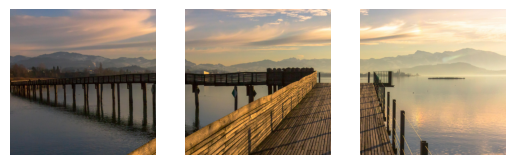

In [3]:
from pathlib import Path
from PIL import Image

image_path = Path('../assets/week-01/test-images-1')
test_image_paths = sorted([image_path for image_path in image_path.iterdir() if image_path.suffix == '.jpg'])
test_images = [Image.open(p) for p in test_image_paths]

plot_images(images=test_images)

### 📝 Aufgabe 1.4 b)
Unsere Panoramaaufnahme sieht gut aus, wir wollen aber auch grössere Bilder plotten können. Dazu brauchen wir eine zweite Reihe (row) von Bildern.
1. Füge der Funktion `plt.subplots` den Parameter `nrows=?` hinzu um eine zweite Reihe von Bildern zu erstellen
2. `axes` ist jetzt nicht mehr eine Liste sondern eine 2-Dimensionale Array (quasi eine Tabelle)
3. Um über diese 2D-Array zu loopen kannst du `axes.flat` verwenden. Das macht aus der 2D-Array wieder eine normale Liste

In [20]:
def plot_images(images: list[Img]):
    figure, axes = plt.subplots(ncols=3, nrows=2)

    for ax, image in zip(axes.flat, images):
        ax.imshow(image)
        ax.axis('off')

    figure.tight_layout()

    plt.show()

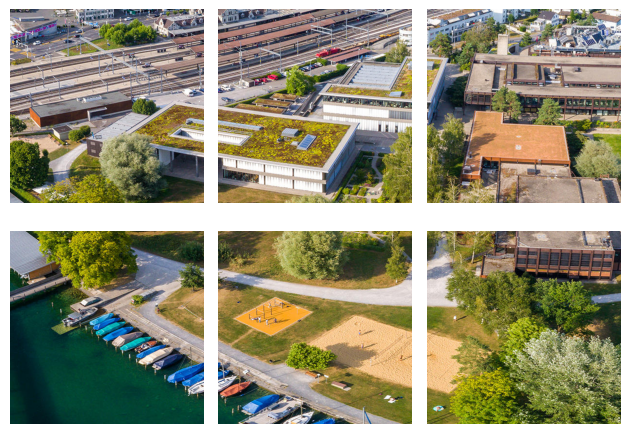

In [21]:
from pathlib import Path
from PIL import Image

image_path = Path('../assets/week-01/test-images-2')
test_image_paths = sorted([image_path for image_path in image_path.iterdir() if image_path.suffix == '.jpg'])
test_images = [Image.open(p) for p in test_image_paths]

plot_images(images=test_images)

Gib beide Funktionen a) und b) deinem Coach ab. Wenn du nicht weiterkommst schaue in der Dokumentation von Matplotlib nach. Du kannst auch ein LLM (wie z.B. ChatGPT, Gemini, Claude usw.) benutzen, kopiere aber nicht nur die Lösung sondern erarbeite Sie mit der AI zusammen. Z.B: *"Ich versuche folgende Aufgabe zu lösen aber komme bei X nicht weiter. Kannst du mir den nächsten Schritt erklären ohne die komplette Lösung zu zeigen..."*